In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from utils import *

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 16) 
mpl.rc('ytick', labelsize = 16)

In [15]:
my_palette_blue = ['#97a7a7', '#2f4f4f']
my_palette_orange = ['#f8c997', '#f6b26b']

In [4]:
PATH_TO_INJECTIONS = '/Users/ulyanadupletsa/Documents/Paper2_Review/results/injections/'
PATH_TO_POSTERIORS = '/Users/ulyanadupletsa/Documents/Paper2_Review/results/posterior_samples/'


event = 'IGWN-GWTC2p1-v2-GW150914_095045_PEDataRelease_mixed_cosmo'
waveform = 'IMRPhenomXPHM'

params = ['chirp_mass', 'mass_ratio', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 
            'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl']
param_unit = {'chirp_mass': r'[$M_{\odot}$]', 'mass_ratio': r'', 'luminosity_distance': r'[Mpc]',
                'dec': r'[rad]', 'ra': r'[rad]', 'theta_jn': r'[rad]', 'psi': r'[rad]',
                'phase': r'[rad]', 'geocent_time': r'[s]', 'a_1': r'', 'a_2': r'',
                'tilt_1': r'[rad]', 'tilt_2': r'[rad]', 'phi_12': r'[rad]',
                'phi_jl': r'[rad]'}
param_label = {'chirp_mass': r'$\mathcal{M}_c$', 'mass_ratio': r'$q$', 'luminosity_distance': r'$d_L$',
                'dec': r'$\texttt{DEC}$', 'ra': r'$\texttt{RA}$', 'theta_jn': r'$\theta_{JN}$', 'psi': r'$\Psi$',
                'phase': r'$\phi$', 'geocent_time': r'$t_c$', 'a_1': r'$a_1$', 'a_2': r'$a_2$',
                'tilt_1': r'$\texttt{tilt}_1$', 'tilt_2': r'$\texttt{tilt}_2$', 'phi_12': r'$\texttt{phi}_{12}$',
                'phi_jl': r'$\texttt{phi}_{JL}$'}

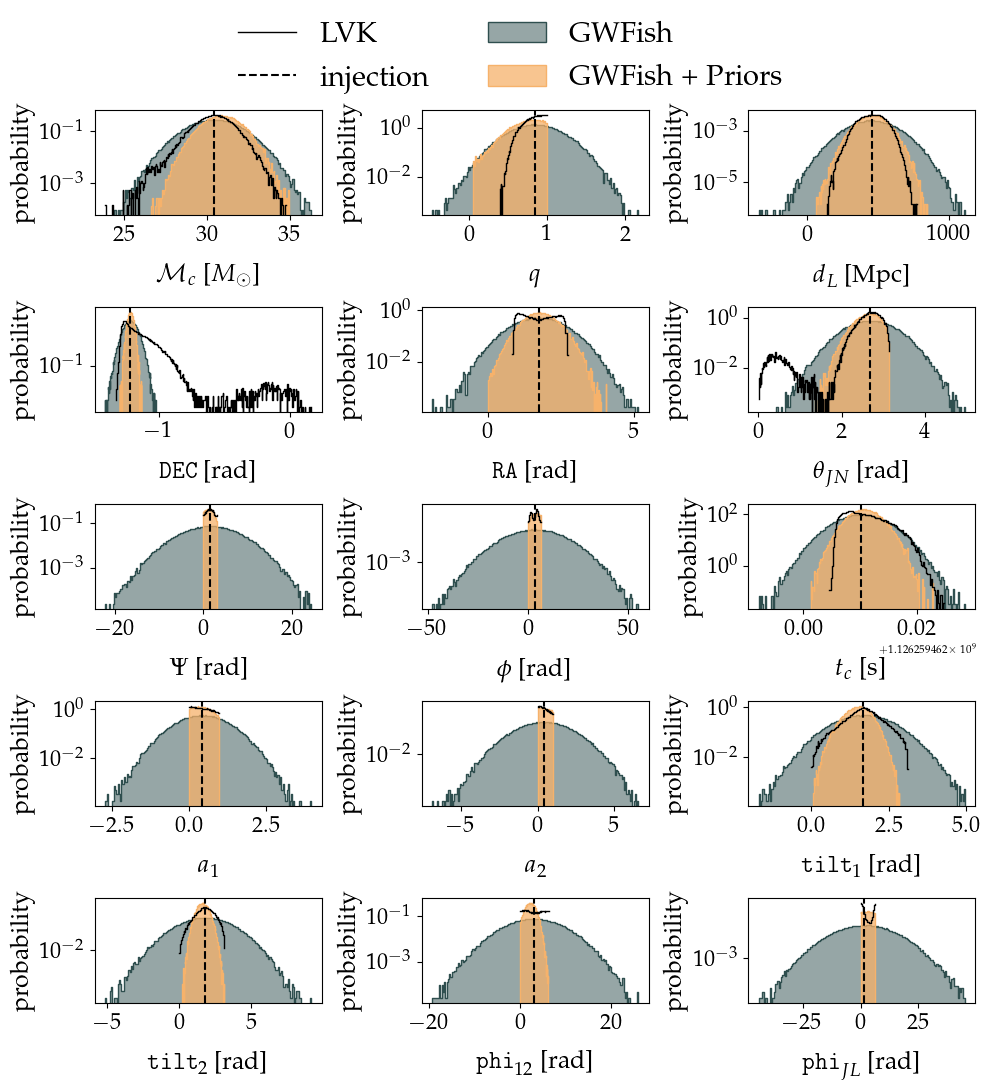

In [17]:
estimator = 'median'
set_fontsize = 18

injections = pd.read_hdf(PATH_TO_INJECTIONS + event + '/%s_%s_%s.hdf5' %(event, waveform, estimator))
lvk_samples = pd.read_hdf(PATH_TO_POSTERIORS + 'lvk_samples/lvk_samples_%s.hdf5' %event)
fisher_samples = pd.read_hdf(PATH_TO_POSTERIORS + 'fisher_samples/fisher_samples_%s_%s.hdf5' %(estimator, event))
fisher_plus_priors_samples = pd.read_hdf(PATH_TO_POSTERIORS + 'fisher_plus_priors_samples/fisher_plus_priors_samples_%s_%s.hdf5' %(estimator, event))

fig, axs = plt.subplots(5, 3, figsize=(10, 10))


for i, param in enumerate(params):
    ax = axs[i//3, i%3]
    ax = sns.histplot(lvk_samples[param], stat='density', element='step', ax=ax, 
                    label='LVK', alpha = 1., color = 'black', linewidth=1., fill=False)
    ax.axvline(injections[param].values[0], color='black', linestyle = 'dashed', label = 'injection', linewidth=1.5)
    ax = sns.histplot(fisher_samples[param], stat='density', element='step', 
                    ax=ax, label='Fisher', alpha = 0.5, color = my_palette_blue[1], linewidth=1.)
    ax = sns.histplot(fisher_plus_priors_samples[param], stat='density', element='step', 
                    ax=ax, label='Fisher + Priors', alpha=0.75, color = my_palette_orange[1], linewidth=1.)
    
    ax.xaxis.get_offset_text().set_fontsize(8)  
    ax.set_ylabel('probability', fontsize=set_fontsize)
    ax.set_xlabel('%s %s' %(param_label[param], param_unit[param]), fontsize=set_fontsize, labelpad=12)
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    
fig.legend(labels=['LVK', 'injection', 'GWFish', 'GWFish + Priors'], fontsize=21, bbox_to_anchor=(0.815,1.1), ncol = 2, frameon=False)
fig.tight_layout()
plt.savefig('plots/samples_comparison_%s_%s.pdf' %(estimator, event), bbox_inches='tight')
plt.show()